# Overview

My wife is an avid K-pop fan and her favorite artists run raffles for 1 on 1 video calls with fans. To enter the raffle she needs to buy one physical musical album per entry. She is considering running a bulk order for a large group of fans in order to maximize her chances of winning. Can we simulate how many albums she needs to buy to maximize her chances of winning? Can we also determine the optimal ratio of albums to buy vs number of winners to maximize chances for the lowest cost?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [2]:
# Assume the total number of winners per raffle is 10
num_winners = 15

# Estimate the total number of albums sold. This value is kept low for script to run quickly. Adjust as needed. 
total_albums = 3000

# Number of times to run simulation to get the mean result
num_simulations = 30

def calc_prob_winning(num_winners=int, total_albums=int, num_simulations=int):
    # Store the results in a list
    results = []

    # Iterate over range of albums starting with 1 album
    for i in range(1, total_albums):
        
        # initiate empty list
        num_draws_to_win = []

        # simulate a series of drawings with i entries into raffle
        for n in range(num_simulations):

            # set initial parameters
            albums_purchased = i
            num_draws = 0
            drawing_result = False

            # Calculate probability of winning
            prob_win = albums_purchased/total_albums
        
            # Draw until a win occurs
            while drawing_result == False:
                drawing_result = np.random.choice([True, False], p=[prob_win, 1 - prob_win])
                
                # Increase num_trials count by 1
                num_draws += 1
            
            # Add number of draws it took for a win to list 
            num_draws_to_win.append(num_draws)

        # Get average drawings to win for current i
        mean_drawings = np.mean(num_draws_to_win)

        # Add mean result to results list as tuple
        results.append((i,mean_drawings))

        # Break loop once we find the number of albums_needed
        if mean_drawings <= num_winners:
            albums_needed = i
            break
        
    # Print the result
    if albums_needed is not None:
        print(f"Albums needed to win: {albums_needed}")
    else:
        print("The required number of albums to win was not found in the simulation.")

    # Zip x,y for elbow analysis
    x,y = zip(*results)

    # x and y contain the data from the results
    kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
    knee = kneedle.elbow

    # Calculate ratio of knee to winners to determine optimal percentage of entries
    # relative to num_winners
    knee_winners_ratio = round(knee/num_winners,2)

    return results, albums_needed, knee_winners_ratio

results, albums_needed, knee_winners_ratio = calc_prob_winning(15, 3000, 30)

Albums needed to win: 157


# Plot Results

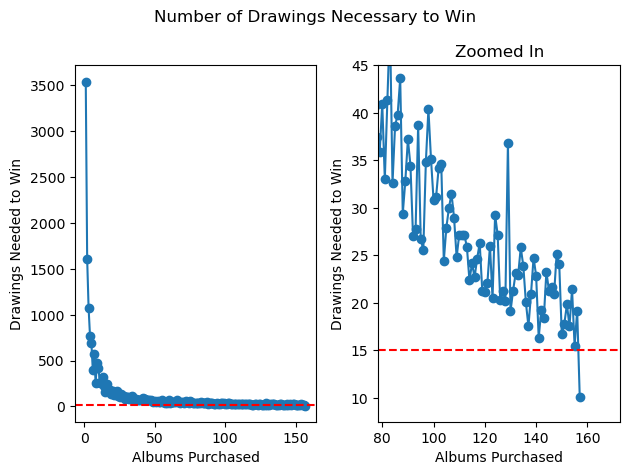

In [3]:
# Unpack list of tuples
x,y = zip(*results)

# Create 1 row, 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Create a line plot
ax1.plot(x, y, marker='o') # 'o' is for circle markers

# Draw a horizontal line at y = 50
ax1.axhline(y=num_winners, color='r', linestyle='--')
# Adding title and labels

ax1.set_xlabel('Albums Purchased')
ax1.set_ylabel('Drawings Needed to Win')

# Create a line plot
ax2.plot(x, y, marker='o') # 'o' is for circle markers

# Draw a horizontal line at y = 50
ax2.axhline(y=num_winners, color='r', linestyle='--')

# Adding title and labels
ax2.set_xlabel('Albums Purchased')
ax2.set_ylabel('Drawings Needed to Win')
ax2.set_title('Zoomed In')

# Set axes limits
y_limit_upper = 3*num_winners 
y_limit_lower = .5*num_winners
ax2.set_ylim(y_limit_lower, y_limit_upper)
x_limit_upper = 1.1*albums_needed
x_limit_lower = 0.5*albums_needed
ax2.set_xlim(x_limit_lower, x_limit_upper)

# Set the overall title for the figure
fig.suptitle('Number of Drawings Necessary to Win')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Find Elbow in Graph
Determine the point after which increasing the number of albums purchased results in diminishing returns in terms of reducing the number of drawings needed.

In [4]:
# x and y contain the data from the results
kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
knee = kneedle.elbow

print(f"The elbow is located at x = {knee}. Odds of winning diminish after purchasing {knee} albums.")

The elbow is located at x = 6. Odds of winning diminish after purchasing 6 albums.


# Determine the Optimal Ratio of Albums to purchase given x number of winners

In [24]:

print(num_winners_list)


[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [6]:
# ratio_results = []

# for i in range(30):

#     # Random number of winners between 1 and 50
#     num_winners = np.random.random_integers(1,50)

#     # Random number of total albums between 300 and 10000
#     total_albums = np.random.random_integers(300, 10000)
    
#     # Ratio of winners to albums
#     ratio_winners_total_albums = num_winners/total_albums

#     # Number of times to run simulation to get the mean result
#     num_simulations = 30

#     # Run simulation
#     results, albums_needed, knee_winners_ratio = calc_prob_winning(num_winners,
#                                                                    total_albums,
#                                                                    num_simulations)
    
#     # Append ratios to ratio_results list
#     ratio_results.append([ratio_winners_total_albums, knee_winners_ratio])
    


/var/folders/tf/_d857dk519v0j3_x_bbjf86r0000gn/T/ipykernel_12600/3681601552.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 50 + 1) instead
  num_winners = np.random.random_integers(1,50)
/var/folders/tf/_d857dk519v0j3_x_bbjf86r0000gn/T/ipykernel_12600/3681601552.py:9: DeprecationWarning: This function is deprecated. Please call randint(300, 10000 + 1) instead
  total_albums = np.random.random_integers(300, 10000)


Albums needed to win: 205
Albums needed to win: 257
Albums needed to win: 178
Albums needed to win: 118
Albums needed to win: 139
Albums needed to win: 353
Albums needed to win: 142
Albums needed to win: 55
Albums needed to win: 48
Albums needed to win: 184
Albums needed to win: 438
Albums needed to win: 657
Albums needed to win: 137
Albums needed to win: 172
Albums needed to win: 122
Albums needed to win: 173
Albums needed to win: 350
Albums needed to win: 153
Albums needed to win: 58
Albums needed to win: 171
Albums needed to win: 3095
Albums needed to win: 119
Albums needed to win: 463
Albums needed to win: 53
Albums needed to win: 62
Albums needed to win: 186
Albums needed to win: 1579
Albums needed to win: 92
Albums needed to win: 22
Albums needed to win: 764
Albums needed to win: 23
Albums needed to win: 935
Albums needed to win: 598
Albums needed to win: 529
Albums needed to win: 256
Albums needed to win: 346
Albums needed to win: 117
Albums needed to win: 182
Albums needed to w

In [42]:
num_winners_list = [x*2 for x in range(1,11)]

ratio_results = []

for n in num_winners_list:

    # Random number of winners between 1 and 50
    num_winners = n

    # Random number of total albums between 300 and 10000
    total_albums = 3000
    
    # Ratio of winners to albums
    ratio_winners_total_albums = num_winners/total_albums

    # Number of times to run simulation to get the mean result
    num_simulations = 30

    # Run simulation
    results, albums_needed, knee_winners_ratio = calc_prob_winning(num_winners,
                                                                   total_albums,
                                                                   num_simulations)
    
    # Append ratios to ratio_results list
    ratio_results.append([ratio_winners_total_albums, knee_winners_ratio])
    


Albums needed to win: 888
Albums needed to win: 541
Albums needed to win: 366
Albums needed to win: 244
Albums needed to win: 208
Albums needed to win: 189
Albums needed to win: 150
Albums needed to win: 148
Albums needed to win: 125
Albums needed to win: 118


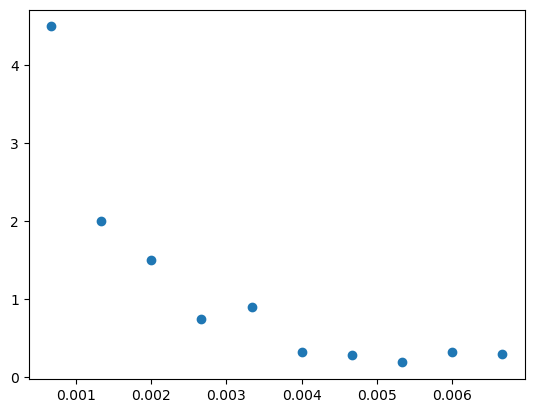

In [43]:
ratio_results
ratio_results_x = [point[0] for point in ratio_results]
ratio_results_y = [point[1] for point in ratio_results]

plt.scatter(ratio_results_x, ratio_results_y)
#plt.ylim(0,0.4)
plt.show()

In [44]:
print(np.mean(ratio_results_y))

1.1090000000000002


In [45]:
array = np.array(ratio_results)
array

array([[6.66666667e-04, 4.50000000e+00],
       [1.33333333e-03, 2.00000000e+00],
       [2.00000000e-03, 1.50000000e+00],
       [2.66666667e-03, 7.50000000e-01],
       [3.33333333e-03, 9.00000000e-01],
       [4.00000000e-03, 3.30000000e-01],
       [4.66666667e-03, 2.90000000e-01],
       [5.33333333e-03, 1.90000000e-01],
       [6.00000000e-03, 3.30000000e-01],
       [6.66666667e-03, 3.00000000e-01]])

In [46]:
filtered_y = array[1:, 1]
print(filtered_y)

[2.   1.5  0.75 0.9  0.33 0.29 0.19 0.33 0.3 ]
